Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Luuk Stiphout, 2014800, U346564"
COLLABORATORS = "Casha van Wanrooij, 2014934, U581640"

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

# exam June 7th, 2018



In the first cell of the notebook, give us your name and student number in the way indicated above. If you do this notebook with --at max.-- one other student, give her/his name and student number as well under "COLLABORATORS".

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam June 7, 2018".



## price effects of mergers

We consider a merger in this notebook. 

First we calculate the equilibrium with three firms, denoted by 1, 2 and 3. Then firms 2 and 3 merge so that we are left with 2 firms; denoted by 1 and 2.

We calculate the effects of the merger on the equilibrium price.

We start by importing the usual libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

The following code helps to calculate the equilibrium for the case with 3 firms. Note that you have seen similar code during the tutorials to calculate the equilibrium with 2 firms.

We assume that before the merger each firm has constant marginal costs equal to 0.3. We assume a simple linear (inverse) demand curve of the form $p=1-Q$ where $p$ denotes price and $Q$ total output on the market. Total output equals the sum of each firm's output: $Q= q_1 + q_2+q_3$.

In [3]:
c0 = 0.3
vector_c = [c0]*3

def p(Q):
    return 1 - Q

def costs(q,c):
    return c*q

def profits(q,Q_other,c):
    return p(q+Q_other)*q-costs(q,c)

def reaction(Q_other,c):
    q1 =  optimize.fminbound(lambda x: -profits(x,Q_other,c),0,1,full_output=1)
    return q1[0]

def fixed_point_three_firms(vector_q,vector_c):
    return [vector_q[0]-reaction(vector_q[1]+vector_q[2],vector_c[0]),
            vector_q[1]-reaction(vector_q[0]+vector_q[2],vector_c[1]),
            vector_q[2]-reaction(vector_q[0]+vector_q[1],vector_c[2])]



#### a) [0.5 points] Show that total equilibrium output equals  0.525. Derive the equilibrium price and Herfindahl index; denote these by `P0` and `H0` resp.

In [4]:
total_output=(sum(optimize.fsolve(lambda q : fixed_point_three_firms(q,vector_c),[0,0,0])))
P0=(p(0.525))

H0=((optimize.fsolve(lambda q : fixed_point_three_firms(q,vector_c),[0,0,0])[0]
 /sum(optimize.fsolve(lambda q : fixed_point_three_firms(q,vector_c),[0,0,0])))**2*3)

print("total equilibrium output =",total_output)
print("P0 =",P0)
print("H0 =",H0)

total equilibrium output = 0.525
P0 = 0.475
H0 = 0.333333333333333


##### 1a explanation
***

* total output is calculated by optimizing *fixed_point_three_firms* using *optimize.fsolve()* and adding all three of them together using *sum()*.
* P0 is calculated by using the formula p(Q) wich is given above.
* H0 is calculated by using the formula (For convenience and readability we used multiplied one outcome by 3 since q1, q2 and q3 are all 0.175): $$H = \sum_{i=1}^n \left(\frac{q_i}{\sum_{j=1}^n q_j} \right)^2$$.
 

#### b) [0.5 point] Define a function `fixed_point_two_firms` with the same structure as the function `fixed_point_three_firms` above, except that it derives the equilibrium output levels for a duopoly (two firms). Test this function by showing that each of the two firms produces 0.3333 in case both firms have zero costs.

In [5]:
def fixed_point_two_firms(q,c):
    return [q[0]-reaction(q[1],c[0]),q[1]-reaction(q[0],c[1])]

initial_guess = [0,0]

optimize.fsolve(lambda q: fixed_point_two_firms(q,[0,0]), initial_guess)

array([0.33333333, 0.33333333])

###### 1b explanation
***

We use the function *fixed_point_two_firms* to select output, taking into considering the output of the other competitor. We then optimized it using *optimize.fsolve()* and used *initial_guess = [0,0]*. As you can see the function returns both firms output as 0.3333 confirming the hypothesis.

The Dutch competition authority, ACM, is asked to evaluate the effects of a merger between firms 2 and 3. Firms 2 and 3 claim that by merging they can reduce their constant marginal costs. But it is not clear by how much they will reduce their costs.

The ACM assumes that the marginal cost level of the merged firm is uniformly distributed between 0 and the current marginal cost level `c0`. The merger will not affect the marginal cost level of firm 1 who does not merge. Firm 1's cost level remains `c0`.

The next cell generates a vector of cost levels for the merged firm, denoted `c_after_merger`. Evaluate "c_after_merger" in a separate cell if you do not understand the command that defines it.

Then it calculates the equilibrium output levels for (the non-merging) firm 1 and (the merged) firm 2.

Note that you need to specify `initial_guess`.


In [6]:
c_after_merger = np.random.uniform(0,c0,size = 100)

q1_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[0] for c in c_after_merger]
q2_after_merger = [optimize.fsolve(lambda q: fixed_point_two_firms(q,[c0,c]), initial_guess)[1] for c in c_after_merger]




#### c) [0.5 points] Create a dataframe called `df_after_merger` with three columns: `c_merged_firm`, `output_non_merging_firm`, `output_merged_firm` containing resp. the cost level of the merged firm, the output level of firm 1 and the output level of firm 2.

In [7]:
initial_guess=[0,0]
data = {'c_after_merger': c_after_merger, 'q1_after_merger': q1_after_merger, 'q2_after_merger': q2_after_merger}
df_after_merger = pd.DataFrame(data=data)

df_after_merger.head()

,c_after_merger,q1_after_merger,q2_after_merger
0,0.260030,0.220010,0.259980
1,0.210769,0.203590,0.292820
2,0.121947,0.173982,0.352035
3,0.152580,0.184193,0.331614
4,0.039355,0.146452,0.407097


###### 1c explanation
***

We made a dataframe containing all the variabels we needed to use and their respective names. We then used that vector to make a dataframe with *pd.DataFrame()* and called the head of the dataframe to see what it looks like.

#### d) [0.5 points] Add three columns to the dataframe with resp. total equilibrium output on the market, `Q`, equilibrium price, `P` and the Herfindahl index, `H`.

In [8]:
df_after_merger['Q'] = df_after_merger['q1_after_merger'] + df_after_merger['q2_after_merger']
df_after_merger['P'] = p(df_after_merger['Q'])
df_after_merger['H'] = ((df_after_merger['q1_after_merger']/df_after_merger['Q'])**2 
                        + (df_after_merger['q2_after_merger']/df_after_merger['Q'])**2)
df_after_merger.head()

,c_after_merger,q1_after_merger,q2_after_merger,Q,P,H
0,0.260030,0.220010,0.259980,0.479990,0.520010,0.503467
1,0.210769,0.203590,0.292820,0.496410,0.503590,0.516155
2,0.121947,0.173982,0.352035,0.526018,0.473982,0.557289
3,0.152580,0.184193,0.331614,0.515807,0.484193,0.540842
4,0.039355,0.146452,0.407097,0.553548,0.446452,0.610856


###### 1d explanation
***

We used *df_after_merger[]* to add the columns we needed.
* To add Q we needed to have the sum of q1_after_merger and q2_after_merger.
* To add P we needed to used the formula of p(Q) defined above.
* To add H we used the formula: $$H = \left( \frac{q_1}{Q} \right)^2 + \left( \frac{q_2}{Q} \right)^2$$

We added all of these and looked at how it by calling *.head()* on the new dataframe.

#### e) [0.5 points] Make a histogram of the equilibrium price `P` after the merger. Also indicate in the histogram the equilibrium price before the merger `P0`. Label the horizontal axis with $P$.

[hint: you may want to use matplotlib's `hist`, `vlines` and `legend` to make this graph (e.g use google to find these functions); but feel free to use something else]

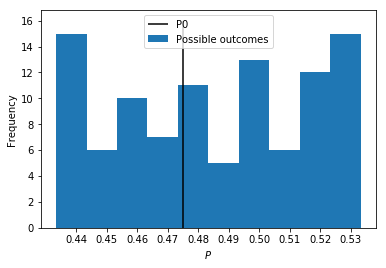

In [9]:
plt.hist(x=df_after_merger['P']),plt.vlines(P0,0,16),plt.legend(['P0','Possible outcomes'])
plt.xlabel('$P$')
plt.ylabel('Frequency')
plt.xticks(np.arange(.44, .53, .01))
plt.show()

###### 1e explanation
***

We used *plt.hist()* with x equal to the equilibrium price given a level of marginal cost reduction for firm 2 after the merger and the frequency on the y-axis. We used *vlines()* to create a straight line in the equilibrium price before the merger wich was 0.475.

#### f) [0.5 points] Explain why sometimes the equilibrium price after the merger exceeds the equilibrium price before the merger and sometimes it is lower than the pre-merger price. [hint: there is a trade off between two effects, depending on which effect dominates, equilibrium price increases or decreases after the merger]

The two effects at play here are:

* A reduction in competition (from 3 companies to 2 companies) which results in higher prices
* A reduction in marginal costs of the merging firms(now called firm 2), which reduces prices

If the second effect dominates, prices will be lower. However if marginal cost for firm 2 is only reduced by a small bit, the first effect dominates and prices will go up.

#### g) [0.5 points] Make a graph with the Herfindahl index on the horizontal axis and the equilibrium price on the vertical axis. This is straightforward for $(H,P)$ after the merger as both values are in the dataframe. Add in another color, the pre-merger combination `(H0,P0)` that we calculated above.

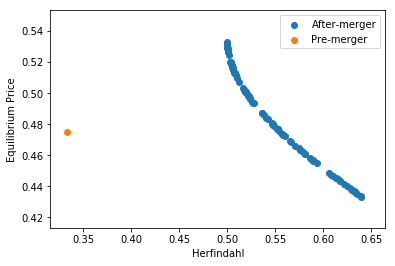

In [10]:
plt.scatter(df_after_merger['H'],df_after_merger['P'])
plt.scatter(H0,P0)
plt.xlabel('Herfindahl')
plt.ylabel('Equilibrium Price')
plt.legend(['After-merger','Pre-merger'])

###### 1g explantion
***

We use *plt.scatter()* to graph the functions. For the graph after the merger we used the H and P from the dataframe we made in question 1d and for the one before the merger we used H0 and P0 wich are defined in question 1a. We use plot.legend() to denote which dots belong to the after-merger situation.

#### h) [0.5 points] Use the graph under g) to discuss the relation between the Herfindahl index and the equilibrium price. To illustrate, some people think that lower values of the Herfindahl index are associated with more competitive outcome. Would you agree with this?

That would be true if a decrease competition wouldn't result in lower costs. If costs are not (or barely) lowered we see a higher price, this can be seen by comparing the orange dot with the highest blue dots. Indeed, the blue dots at the top have a much higher equalibrium price than the pre-merger situation. 


But if by merging firms can (significantly) reduce their costs, a loss of competition can result in lower prices, as is the case in this example, just look at the blue dots. If firm 2's marginal costs are lowered, it starts producing relatively more and the Herfindahl index increases. However this lower cost results in a lower overall price, as illustrated in the graph by the negative relation between costs and herfindahl index of the blue dots. If this reduction of cost is enough to offset the loss of a competitor, prices will drop below the pre-merger situation.

So it cannot be concluded that a lower Herfindahl index is always a good indicator for a more competitive outcome, since marginal cost plays a role as well.

## Github

After you have finished, we need to upload this notebook on github. Make sure that you upload the file on the github page of each collaborator.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.